# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

In [1]:
import pandas as pd
import numpy as np
import math
import json
% matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [2]:
portfolio.head()


,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


In [3]:
portfolio.shape

(10, 6)

In [4]:
def portfolio_cleaning(portfolio):
    """Here we are cleaning columns making cateorical variable to dummies and then appending them this function 
    will output a preprocessed portfolio dataframe"""
    channels_list=np.unique(np.concatenate(portfolio['channels']))
    channels_arr = np.array([portfolio['channels'].map(lambda cha: ch in cha) for ch in channels_list])
    a=pd.get_dummies(portfolio['offer_type'],prefix='column',prefix_sep='_')
    feature_table = pd.concat([ pd.DataFrame(data=channels_arr.T, columns=channels_list),a], axis=1)
    feature_table['difficulty']=portfolio.difficulty
    feature_table['id']=portfolio.id
    feature_table["reward"]=portfolio.reward
    feature_table["duration"]=portfolio.duration
    return feature_table
processesed_portfolio=portfolio_cleaning(portfolio)

In [5]:
processesed_portfolio.head()

,email,mobile,social,web,column_bogo,column_discount,column_informational,difficulty,id,reward,duration
0,True,True,True,False,1,0,0,10,ae264e3637204a6fb9bb56bc8210ddfd,10,7
1,True,True,True,True,1,0,0,10,4d5c57ea9a6940dd891ad53e9dbe8da0,10,5
2,True,True,False,True,0,0,1,0,3f207df678b143eea3cee63160fa8bed,0,4
3,True,True,False,True,1,0,0,5,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,7
4,True,False,False,True,0,1,0,20,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,10


In [6]:
profile.head()

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


# reveiwing different column for profile dataframe

In [7]:
profile['id'].nunique()==profile.shape[0]

#so all id are unique

True

In [8]:
#analysing null values percentage
profile.isnull().sum()/profile.shape[0]

age                 0.000000
became_member_on    0.000000
gender              0.127941
id                  0.000000
income              0.127941
dtype: float64

(array([ 1308.,  1438.,  2054.,  3383.,  3257.,  2031.,   966.,   361.,
           27.,  2175.]),
 array([  18.,   28.,   38.,   48.,   58.,   68.,   78.,   88.,   98.,
         108.,  118.]),
 <a list of 10 Patch objects>)

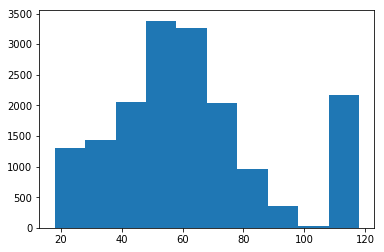

In [9]:
#plotting histogram distribution of age
import matplotlib.pyplot as plt
plt.hist(profile.age)

In [10]:
# Here we see that income and gender is null at same time and is 2174
print(profile[(profile['income'].isnull()==True)&(profile['gender'].isnull()==True)].shape)

(2175, 5)


In [11]:
profile[profile.age>100].isnull().sum()

'''as we can see it is when age is greater than 100 then only  gender and income is null so it is better to 
drop this data as it looks completly wrong data as out of 5 three columns are not logically possible or null'''

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

(array([ 1731.,  1707.,  2234.,  2210.,  2345.,  1435.,  1215.,   990.,
          498.,   460.]),
 array([  30000.,   39000.,   48000.,   57000.,   66000.,   75000.,
          84000.,   93000.,  102000.,  111000.,  120000.]),
 <a list of 10 Patch objects>)

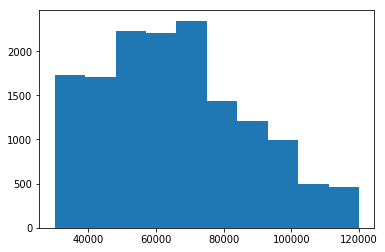

In [17]:
#plotting data 
plt.hist(profile.income.dropna())

In [18]:
from datetime import date
def processing_profile(profile):
    '''this function will give a cleaned procssed datframe in which we change became member on column 
       to number of days he has been member to the latest member'''
    profile=profile[profile['age']<100]
    a=pd.get_dummies(profile['gender'],prefix='column',prefix_sep='_')
    feature_table=profile[['id','age','income','became_member_on']]
    feature_table['became_member_on']=profile['became_member_on'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
    feature_table['became_member_on']=max(feature_table['became_member_on'])-feature_table['became_member_on']
    feature_table['became_member_on']=feature_table['became_member_on'].apply(lambda x:x.days)
    feature_table=pd.concat([feature_table,a],axis=1)
    return feature_table
processed_profile=processing_profile(profile)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#index

In [19]:
processed_profile.head()


,id,age,income,became_member_on,column_F,column_M,column_O
1,0610b486422d4921ae7d2bf64640c50b,55,112000.0,376,1,0,0
3,78afa995795e4d85b5d9ceeca43f5fef,75,100000.0,443,1,0,0
5,e2127556f4f64592b11af22de27a7932,68,70000.0,91,0,1,0
8,389bc3fa690240e798340f5a15918d5c,65,53000.0,167,0,1,0
12,2eeac8d8feae4a8cad5a6af0499a211d,58,51000.0,257,0,1,0


In [20]:
processed_profile.describe()
# here wee can see it contains 57% men,41% women and about 2% who have given gender as other

,age,income,became_member_on,column_F,column_M,column_O
count,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000,14808.000000
mean,54.340829,65394.313884,522.521745,0.412952,0.572798,0.014249
std,17.323921,21595.072904,419.268141,0.492381,0.494689,0.118520
min,18.000000,30000.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,49000.000000,208.000000,0.000000,0.000000,0.000000
50%,55.000000,64000.000000,358.000000,0.000000,1.000000,0.000000
75%,66.000000,80000.000000,797.000000,1.000000,1.000000,0.000000
max,99.000000,120000.000000,1823.000000,1.000000,1.000000,1.000000


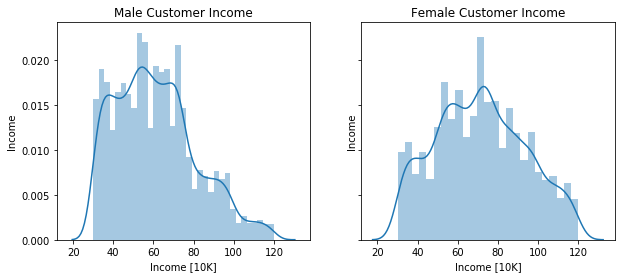

In [21]:
"""Here we are visualizing plot for income of male and female customers"""
import seaborn as sns
male_customers = processed_profile[processed_profile['column_M'] == 1]
female_customers = processed_profile[processed_profile['column_F'] == 1]


# to be able to draw two subplots in a row
fig, ax = plt.subplots(figsize=(10, 4), nrows=1, ncols=2, sharex=True, sharey=True)

# plot a male customers income distribution
plt.sca(ax[0])
sns.distplot(male_customers['income'] * 1E-3)
plt.xlabel('Income [10K]')
plt.ylabel('Income')
plt.title('Male Customer Income')

# plot a female customers income distribution
plt.sca(ax[1])
sns.distplot(female_customers['income'] * 1E-3)
plt.xlabel('Income [10K]')
plt.ylabel('Income')
plt.title('Female Customer Income');

In [22]:
transcript.head()

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


# Cleaning and transforming transcript data

In [23]:
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'], dtype=object)

In [24]:
transcript.rename(columns={'person': 'customer_id'}, inplace=True)

In [25]:
def create_offer_id_col(val):
    'seprating offers values'
    if list(val.keys())[0] in ['offer id', 'offer_id']:
        return list(val.values())[0]
    
def create_amount_col(val):
    'seprating amount values'
    if list(val.keys())[0] in ['amount']:
        return list(val.values())[0]
    
transcript['offer_id'] = transcript.value.apply(create_offer_id_col)
transcript['amount'] = transcript.value.apply(create_amount_col)

# change amount column type to float
transcript.amount.astype('float')

# drop value column
transcript.drop(columns=['value'], inplace=True)

In [202]:
#converting time to days
transcript['time']/=24.0

In [203]:
transcript.isnull().sum()/transcript.shape[0]

event          0.000000
customer_id    0.000000
time           0.000000
offer_id       0.453304
amount         0.546696
dtype: float64

In [204]:
transcript.shape

(306534, 5)

In [205]:
#drooping those rows whose customer id is not in processed profile dataframe
transcript=transcript[transcript.customer_id.isin(processed_profile.id)]

In [206]:
transcript.shape

(272430, 5)

In [207]:
#dropping duplicates
transcript.duplicated().sum()
transcript.drop_duplicates(inplace=True)

transcript.reset_index(drop=True, inplace=True)

In [208]:
transcript.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272056 entries, 0 to 272055
Data columns (total 5 columns):
event          272056 non-null object
customer_id    272056 non-null object
time           272056 non-null float64
offer_id       148254 non-null object
amount         123802 non-null float64
dtypes: float64(2), object(3)
memory usage: 10.4+ MB


In [209]:
#making a new dataframe which only contain transaction data
transaction_df = transcript[transcript.event=='transaction'].copy()

transaction_df.drop(columns=['offer_id', 'event'], inplace=True)
transaction_df.head()

,customer_id,time,amount
11014,02c083884c7d45b39cc68e1314fec56c,0.0,0.83
11017,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0.0,34.56
11019,54890f68699049c2a04d415abc25e717,0.0,13.23
11027,b2f1cd155b864803ad8334cdf13c4bd2,0.0,19.51
11028,fe97aa22dd3e48c8b143116a8403dd52,0.0,18.97


In [213]:
#making a new dataframe which only contain offer data
offers_df = transcript[transcript.event!='transaction'].copy()

# one-hot encode offer event
offers_df['received'] = offers_df.event.apply(lambda x: 1 if x == 'offer received' else 0)
offers_df['completed'] = offers_df.event.apply(lambda x: 1 if x == 'offer completed' else 0)
offers_df['viewed'] = offers_df.event.apply(lambda x: 1 if x == 'offer viewed' else 0)

offers_df.drop(columns=['event', 'amount'], inplace=True)

In [214]:
offers_df.head()

,customer_id,time,offer_id,received,completed,viewed
0,78afa995795e4d85b5d9ceeca43f5fef,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,0,0
1,e2127556f4f64592b11af22de27a7932,0.0,2906b810c7d4411798c6938adc9daaa5,1,0,0
2,389bc3fa690240e798340f5a15918d5c,0.0,f19421c1d4aa40978ebb69ca19b0e20d,1,0,0
3,2eeac8d8feae4a8cad5a6af0499a211d,0.0,3f207df678b143eea3cee63160fa8bed,1,0,0
4,aa4862eba776480b8bb9c68455b8c2e1,0.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0


In [217]:
transcript.event.value_counts()

transaction        123802
offer received      66427
offer viewed        49802
offer completed     32025
Name: event, dtype: int64

In [220]:
def merge(portfolio,profile,transaction_df,offers_df):
    """This function will give a final dataframe in which we have merged all four specified  dataframe columns according 
    to requirment """
    data=[]
    customer_ids= offers_df.customer_id.unique()
    length=len(customer_ids)
    # loop through all customer ids in offers_df
    for ids in range(len(customer_ids)):
        customer_id=customer_ids[ids]
        customer_profile = profile[profile['id']==customer_id]
        customer_offer_data = offers_df[offers_df['customer_id']==customer_id]
        customer_transaction_data=transaction_df[transaction_df['customer_id']==customer_id]
        customer_offer_received=customer_offer_data[customer_offer_data['received']==1]
        customer_offer_viewed=customer_offer_data[customer_offer_data['viewed']==1]
        customer_offer_completed=customer_offer_data[customer_offer_data['completed']==1]
        rows=[]
        for i in range(customer_offer_received.shape[0]):
            offer_id=customer_offer_received.iloc[i]['offer_id']
            
            customer_data = profile[profile['id']==customer_id]
            
            offer_data = portfolio.loc[portfolio['id'] == offer_id]
            
            duration_days = offer_data['duration'].values[0]
            start_time = customer_offer_received.iloc[i]['time']
            end_time = start_time + duration_days
            
            offer_completed_intime = np.logical_and(
                customer_offer_completed['time'] >= start_time, customer_offer_completed['time'] <= end_time)
            
            offer_viewed_intime = np.logical_and(
                customer_offer_viewed['time'] >= start_time, customer_offer_viewed['time'] <=end_time)
            
            offer_successful = offer_completed_intime.sum() > 0 and offer_viewed_intime.sum() > 0
            
            transaction_intime = np.logical_and(
                customer_transaction_data['time'] >= start_time, customer_transaction_data['time'] <= end_time)
            transaction_data = customer_transaction_data[transaction_intime]
            
            transaction_total_amount = transaction_data['amount'].sum()
            row = {
                'offer_id': offer_id,
                'customer_id': customer_id,
                'time': start_time,
                'total_amount': transaction_total_amount,
                'offer_successful': int(offer_successful),
            }
            row.update(offer_data.iloc[0,0:].to_dict())

            row.update(customer_profile.iloc[0,:].to_dict())

            rows.append(row)
        if ids%(length//10)==0:
            print(ids/(length//10))
        
        data.extend(rows)
    
    data = pd.DataFrame(data)
    return data
            
        
        
        
    

In [221]:
data = merge( processesed_portfolio,processed_profile,transaction_df,offers_df)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0


In [222]:
data.shape

(66427, 22)

In [224]:
data.offer_successful.value_counts()

0    35107
1    31320
Name: offer_successful, dtype: int64

In [225]:
data.columns

Index(['age', 'became_member_on', 'column_F', 'column_M', 'column_O',
       'column_bogo', 'column_discount', 'column_informational', 'customer_id',
       'difficulty', 'duration', 'email', 'id', 'income', 'mobile', 'offer_id',
       'offer_successful', 'reward', 'social', 'time', 'total_amount', 'web'],
      dtype='object')

In [228]:
"""Dropping few similar or not important columns with same name"""


columns_list = ['time', 'offer_id', 'customer_id', 'total_amount', 
                'offer_successful', 'difficulty', 'duration', 
                'reward', 'column_bogo', 'column_discount', 'column_informational',
                'email', 'mobile', 'social', 'web', 'became_member_on',
                'column_F', 'column_M', 'column_O', 'income', 'age']
processed_data=data[columns_list]

In [229]:
processed_data.head()

,time,offer_id,customer_id,total_amount,offer_successful,difficulty,duration,reward,column_bogo,column_discount,...,email,mobile,social,web,became_member_on,column_F,column_M,column_O,income,age
0,0.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,78afa995795e4d85b5d9ceeca43f5fef,37.67,1,5,7,5,1,0,...,True,True,False,True,443,1,0,0,100000.0,75
1,7.0,5a8bc65990b245e5a138643cd4eb9837,78afa995795e4d85b5d9ceeca43f5fef,49.39,0,0,3,0,0,0,...,True,True,True,False,443,1,0,0,100000.0,75
2,17.0,ae264e3637204a6fb9bb56bc8210ddfd,78afa995795e4d85b5d9ceeca43f5fef,48.28,1,10,7,10,1,0,...,True,True,True,False,443,1,0,0,100000.0,75
3,21.0,f19421c1d4aa40978ebb69ca19b0e20d,78afa995795e4d85b5d9ceeca43f5fef,48.28,1,5,5,5,1,0,...,True,True,True,True,443,1,0,0,100000.0,75
4,0.0,2906b810c7d4411798c6938adc9daaa5,e2127556f4f64592b11af22de27a7932,0.00,0,10,7,2,0,1,...,True,True,False,True,91,0,1,0,70000.0,68


In [231]:
processed_data.to_csv('final_data.csv', index=False)

In [26]:
processed_data=pd.read_csv('final_data.csv')

array([0, 1])

In [39]:
def analysing_sucess_precentage(processed_data):
    '''return a dataframe conating offers_id,succesfull count, offers given and percentage of sucess for each offer'''
    a=pd.DataFrame(processed_data[['offer_id','offer_successful']].groupby('offer_id').sum(),index=None)
    b=pd.DataFrame(processed_data.offer_id.value_counts())
    sucesful_perc = pd.merge(a, b, left_index=True, right_index=True)
    sucesful_perc['%percent_succes']=(sucesful_perc['offer_successful']*100)/sucesful_perc['offer_id']
    sucesful_perc=sucesful_perc.sort_values('%percent_succes',ascending=False).reset_index()
    
    return sucesful_perc
sucesful_perc=analysing_sucess_precentage(processed_data)

In [40]:
sucesful_perc

,index,offer_successful,offer_id,%percent_succes
0,fafdcd668e3743c1bb461111dcafc2a4,4997,6639,75.267360
1,2298d6c36e964ae4a3e7e9706d1fb8c2,4839,6652,72.745039
2,f19421c1d4aa40978ebb69ca19b0e20d,4045,6568,61.586480
3,ae264e3637204a6fb9bb56bc8210ddfd,3648,6678,54.627134
4,4d5c57ea9a6940dd891ad53e9dbe8da0,3403,6585,51.678056
5,9b98b8c7a33c4b65b9aebfe6a799e6d9,3226,6682,48.278958
6,2906b810c7d4411798c6938adc9daaa5,3157,6619,47.696027
7,0b1e1539f2cc45b7b9fa7c272da2e1d7,3075,6719,45.765739
8,3f207df678b143eea3cee63160fa8bed,513,6648,7.716606
9,5a8bc65990b245e5a138643cd4eb9837,417,6637,6.282959


Text(0,0.5,' offer Success percentage')

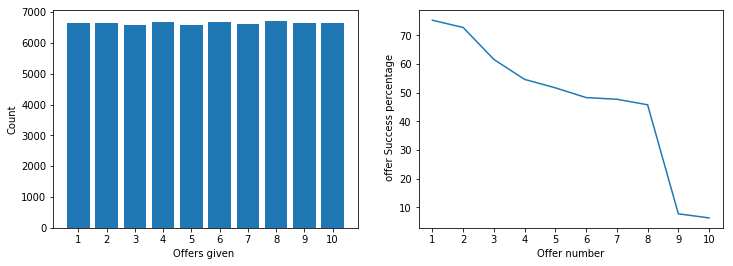

In [41]:
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)

ax[0].bar(sucesful_perc.index + 1, sucesful_perc['offer_id'])
ax[0].set_xticks(np.arange(0,10) + 1)
ax[0].set_xlabel('Offers given ')
ax[0].set_ylabel('Count')

ax[1].plot(sucesful_perc.index + 1, sucesful_perc['%percent_succes'])
ax[1].set_xticks(np.arange(0,10) + 1)
ax[1].set_xlabel('Offer number')
ax[1].set_ylabel(' offer Success percentage')

In [47]:
processed_data1 = processed_data.drop(columns=['time', 'customer_id'])

In [48]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [54]:
def data_split(processed_data1):
    """spliting data in train and test data"""
    X=processed_data1.drop(columns=['offer_successful'])
    y=processed_data1['offer_successful']
    X_train,X_test,y_train,y_test=train_test_split(X.values,y.values,test_size=0.25,random_state=42)
    return X_train,X_test,y_train,y_test
X_train,X_test,y_train,y_test=data_split(processed_data1)

In [55]:
offer_id_train = X_train[:, 0]
total_amount_train = X_train[:, 1]
X_train = X_train[:, 2:].astype('float64')

# test-data: extract offer_id, total_amount and convert other features to float 
offer_id_test = X_test[:, 0]
total_amount_test = X_test[:, 1]
X_test = X_test[:, 2:].astype('float64')

# convert train and test labels to array
y_train = y_train.ravel()
y_test = y_test.ravel()

In [58]:
rf_clf = RandomForestClassifier(random_state=42)

# Number of trees in random forest
n_estimators = [10, 50, 100, 150, 200, 250, 300]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.arange(3, 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
grid_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# tune the classifer
rf_random = RandomizedSearchCV(estimator = rf_clf,
                               param_distributions = grid_params,
                               n_iter = 100,
                               cv = 3,
                               verbose=2,
                               random_state=42,
                               n_jobs = 3)

# fit train data to the classifier
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=9 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=9 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=9 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=9, total=   1.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=9, total=   1.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=9, total=   1.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_

[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:  3.6min


[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=3, total=   5.1s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, total=   8.8s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, total=   8.7s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=7, total=   8.8s
[CV] n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9 
[CV]  n_estimators=250, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=9, total=  25.6s
[CV] n_estimators=150, min_samples_split=10, min_samples_leaf

[Parallel(n_jobs=3)]: Done 156 tasks      | elapsed: 12.9min


[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, total=   9.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, total=   9.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=150, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=4, total=   9.0s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   6.9s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=9 
[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   7.0s
[CV] n_estimators=150, min_samples_split=2, min_samples_leaf=

[Parallel(n_jobs=3)]: Done 300 out of 300 | elapsed: 25.5min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=3,
          param_distributions={'n_estimators': [10, 50, 100, 150, 200, 250, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [62]:
import re
def evaluate_model_performance(clf, X_train, y_train):
    class_name = re.sub("[<>']", '', str(clf.__class__))
    class_name = class_name.split(' ')[1]
    class_name = class_name.split('.')[-1]

    y_pred_rf = clf.predict(X_train)

    clf_accuracy = accuracy_score(y_train, y_pred_rf)
    clf_f1_score = f1_score(y_train, y_pred_rf)
    
    print("%s model accuracy: %.3f" % (class_name, clf_accuracy))
    print("%s model f1-score: %.3f" % (class_name, clf_f1_score))
    
    return clf_accuracy, clf_f1_score

In [63]:
evaluate_model_performance(rf_random.best_estimator_, X_train, y_train)

RandomForestClassifier model accuracy: 0.764
RandomForestClassifier model f1-score: 0.749


(0.76389000401445206, 0.74864847539477331)

In [64]:
evaluate_model_performance(rf_random.best_estimator_, X_test, y_test)

RandomForestClassifier model accuracy: 0.737
RandomForestClassifier model f1-score: 0.717


(0.73667730475100857, 0.71697624749207156)

#conlusion



The problem that I chose to solve was to build a model that predicts whether a customer will respond to an offer. My strategy for solving this problem has mainly two steps. First, I clean and process offer portfolio, customer profile, and transaction data and then i merged them. Second, I used random forest model has a training data accuracy of 0.763 and an F1-score of 0.748. The test data set accuracy of 0.736 and F1-score of 0.716 suggests that the random forest model  did not overfit the training data.

However, the performance of a random forest model can be  improved by analysing features which impacts an offer’s success rate as a function of offer difficulty, duration, and reward. These additional features should provide a random forest classifier with the opportunity to construct a better decision boundary that separates successful and unsuccessful customer offers.

the data were combined into one single dataset, it felt as though the models might have benefited from more data. With more data, the classification models may have been able to produce better accuracy and F1-score results.

Additionally, better predictions may have been deducted if there were more customer metrics. For this analysis, I feel we had limited information about customer available to us — just age, gender, and income. To find optimal customer demographics, it would be nice to have a few more features of a customer. These additional features may aid in providing better classification model results.

We can use other approaches like svm, Logistics regression and can also use neural network maty be those can be helpful.
